### 学习Andrew的ML入门课程的coding笔记 

下面简单模拟BGD算法在单变量线性回归模型中的使用

Train time : 0  w : 1.3855555555555554  b : 0.09444444444444444 cost : 42.06364259259257
Train time : 10  w : 0.892297372510098  b : 0.17908182289796098 cost : 5.324226390257099
Train time : 20  w : 0.7664458553527458  b : 0.28190511611895275 cost : 3.0020324816101955
Train time : 30  w : 0.7308439672343664  b : 0.3864725249289808 cost : 2.7564464504316786
Train time : 40  w : 0.7175280170073073  b : 0.4888423727974696 cost : 2.6426056984924653
The final line is 0.709184802396677x + 0.5782715985512206
The final cost is 2.5527448897291136
The total time cost is : 2.006053 ms 


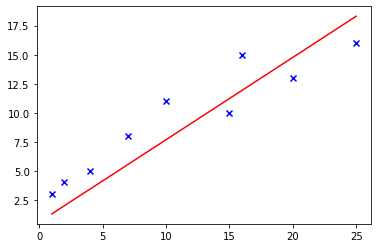

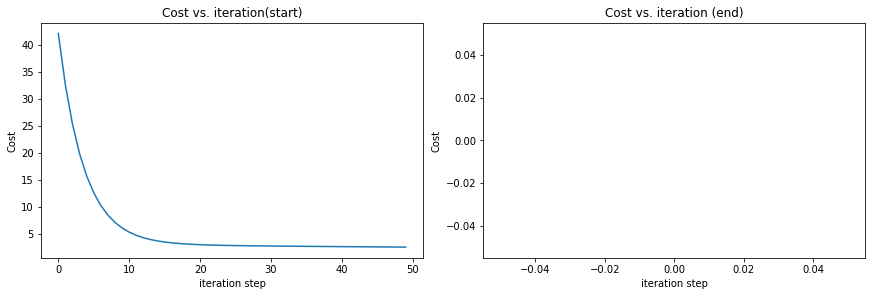

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
x = np.array([1,2,4,7,10,15,16,20,25])
y = np.array([3,4,5,8,11,10,15,13,16])
plt.scatter(x,y,marker='x',c='b')
# plt.show()

def cost_func(w,b,x,y):
    n = x.shape[0]
    cost = 0
    for i in range(n):
        cost += (w*x[i]+b-y[i])**2
    cost /= (2*n)
    return cost

def derivative_w(w,b,x,y):
    n = x.shape[0]
    val_w = 0
    for i in range(n):
        val_w += x[i]*(w*x[i]+b-y[i])
    val_w /= n
    # print(val_w)
    return val_w

def derivative_b(w,b,x,y):
    n = x.shape[0]
    val_b = 0
    for i in range(n):
        val_b += (w*x[i]+b-y[i])
    val_b /= n
    return val_b

## BGD algorithm
def change_parameter(x,y,cost_hist,w=0,b=0,lr=0.1,epoch=10):
    cost = cost_func(w,b,x,y)
    for epoch_time in range(epoch):
        der_w,der_b = derivative_w(w,b,x,y),derivative_b(w,b,x,y)
        w = w - lr * der_w
        b = b - lr * der_b
        cost = cost_func(w,b,x,y)
        cost_hist.append(cost)

        if epoch_time % 10 == 0 :
            print("Train time : "+ str(epoch_time) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

start = time.time()
cost_hist = []
w,b = change_parameter(x,y,cost_hist,w=0,b=0,lr=0.01,epoch=50)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 25, 50)
yy = w*xx + b

end = time.time()
print("The total time cost is : " + str((end-start)*1000)[:8] + " ms ")

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


使用了简单的BGD算法进行模型的训练，其中循环的终止条件有多种，这里借鉴了lab里面用循环次数作为终止条件比较好看，也绘制了cost曲线来追踪模型的训练过程。

下面使用kaggle上的数据集进行训练 lr降低了好多才防止了发散 用了BGD 速度比较慢  epoch为100 batch为700

Train time : 0  w : 0.4165209450891801  b : 0.006238951057021424 cost : 569.5714437935256
Train time : 10  w : 0.9961143375934723  b : 0.014884070688671718 cost : 3.958309503990747
Train time : 20  w : 0.9987422324817409  b : 0.014881132244676291 cost : 3.946686097410925
Train time : 30  w : 0.9987547758060816  b : 0.014839005849066006 cost : 3.946684426544642
Train time : 40  w : 0.9987554636946798  b : 0.014796715010087183 cost : 3.9466829953738767
The final line is 0.9987560342830971x + 0.014758663858692673
The final cost is 3.946681708091195
The total time ( 50 epoches ) cost is : 48.99954 ms 


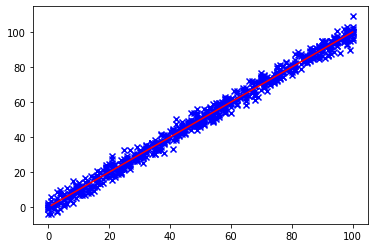

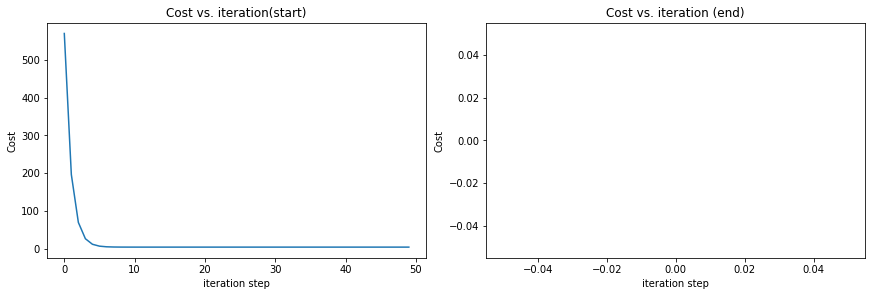

In [2]:
import numpy as np
filename = 'C:\\Users\\Chan\\Desktop\\XLANCE\\machine_learning_study\\note\\lecture1\\train.csv'

with open(filename,'rt',encoding='UTF-8')as raw_data:
    data=np.loadtxt(raw_data,delimiter=',')

# print(data)
# print(data.shape)
x = data[:,0]
y = data[:,1]
plt.scatter(x,y,marker='x',c='b')
# plt.show()

start = time.time()
cost_hist = []

epoch = 50
w,b = change_parameter(x,y,cost_hist,w=0,b=0,lr=0.000125,epoch=epoch)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 100, 50)
yy = w*xx + b

end = time.time()
print("The total time ( " +  str(epoch) +" epoches ) cost is : " + str((end-start)*1000)[:8] + " ms ")

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()



下面使用SGD算法看看效果  打乱数据的时候想到一个tricky的方法 只用打乱一个下标的数组就好了  ———效果奇差。。

Train time : 0  w : 0.9984928073551393  b : 0.01635527354519158 cost : 3.946831658114901
Train time : 10  w : 1.0019469636072282  b : 0.005315295801581342 cost : 3.9618803635534134
Train time : 20  w : 0.998048926154996  b : -0.005222292053883008 cost : 3.947746202569516
Train time : 30  w : 0.978600022542765  b : -0.014262500894418531 cost : 4.652939067595999
Train time : 40  w : 1.0115427812135083  b : -0.022975431443583137 cost : 4.194674742074341
The final line is 0.9908819809659261x + -0.030660002437978624
The final cost is 4.067464185639849
The total time ( 50 epoches ) cost is : 12873.74 ms 


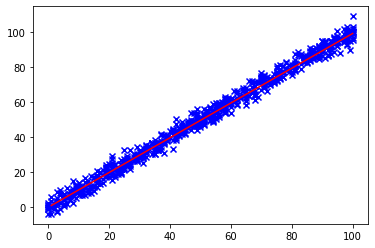

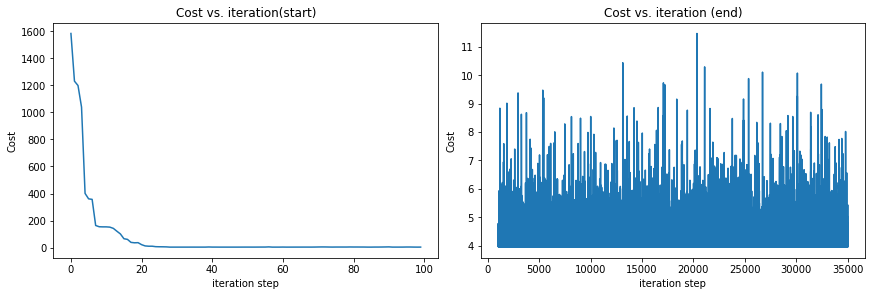

In [4]:
def random_derivative_w(w,b,i,random_index):
    index =  random_index[i]
    return x[index]*(w*x[index]+b-y[index])

def random_derivative_b(w,b,i,random_index):
    index =  random_index[i]
    return w*x[index]+b-y[index]


def SGD(x,y,cost_hist,w=0,b=0,lr=0.1,epoch=50):
    cost = cost_func(w,b,x,y)
    n = x.shape[0]
    random_index = np.arange(n)
    for epoch_time in range(epoch):
        for iteration in range(n):
            der_w,der_b = random_derivative_w(w,b,iteration,random_index),random_derivative_b(w,b,iteration,random_index)
            w = w - lr * der_w
            b = b - lr * der_b
            cost = cost_func(w,b,x,y)
            cost_hist.append(cost)

        np.random.shuffle(random_index)

        if epoch_time % 10 == 0 :
            print("Train time : "+ str(epoch_time) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

x = data[:,0]
y = data[:,1]
plt.scatter(x,y,marker='x',c='b')

start = time.time()
cost_hist = []
epoch = 50

w,b = SGD(x,y,cost_hist,w=0,b=0,lr=0.00005,epoch=epoch)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 100, 50)
yy = w*xx + b

end = time.time()
print("The total time ( " +  str(epoch) +" epoches ) cost is : " + str((end-start)*1000)[:8] + " ms ")

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()


In [5]:
import random

最后使用mini BGD算法进行测试  由于是小批量的训练 batch选择是70  

Train time : 0  w : 0.9957241291033352  b : 0.015776536825225465 cost : 3.961894970684468
Train time : 10  w : 0.9970029613379404  b : 0.015350910897750645 cost : 3.951776453509735
Train time : 20  w : 0.9973302119290588  b : 0.014915081785658868 cost : 3.9500671477504214
Train time : 30  w : 0.9938240965165034  b : 0.014413908862731546 cost : 3.987324935460967
Train time : 40  w : 0.9984395995051196  b : 0.014043763945185635 cost : 3.9468362542839395
The final line is 0.9993265557437885x + 0.013657979941692905
The final cost is 3.947156264703396
The total time ( 50 epoches ) cost is : 225.6429 ms 


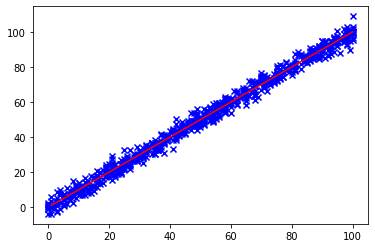

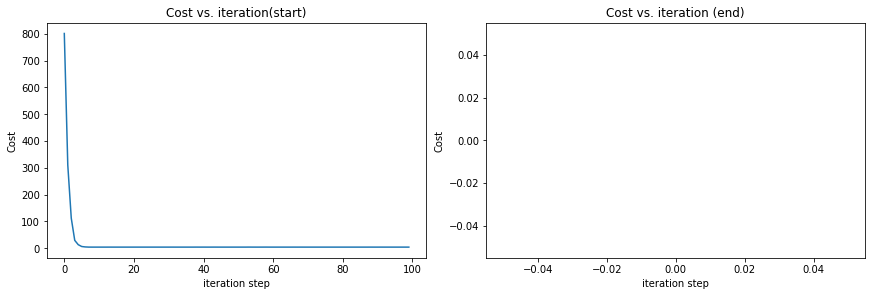

In [6]:
def derivative_w_mini(w,b,x,y,random_index,start_index,batch):
    val_w = 0
    for i in range(start_index,start_index+batch):
        index =  random_index[i]
        val_w += x[index]*(w*x[index]+b-y[index])
    val_w /= batch
    return val_w

def derivative_b_mini(w,b,x,y,random_index,start_index,batch):
    val_b = 0
    for i in range(start_index,start_index+batch):
        index =  random_index[i]
        val_b += (w*x[index]+b-y[index])
    val_b /= batch
    return val_b

def mini_BGD(x,y,cost_hist,w=0,b=0,lr=0.1,epoch=10,batch = 128):
    cost = cost_func(w,b,x,y)
    n = x.shape[0]
    random_index = np.arange(n)
    for epoch_time in range(epoch):
        for iteration in range(n//batch):
            der_w,der_b = derivative_w_mini(w,b,x,y,random_index,iteration*batch,batch=batch),derivative_b_mini(w,b,x,y,random_index,iteration*batch,batch=batch)
            w = w - lr * der_w
            b = b - lr * der_b
            cost = cost_func(w,b,x,y)
            cost_hist.append(cost)

        np.random.shuffle(random_index)

        if epoch_time % 10 == 0 :
            print("Train time : "+ str(epoch_time) , " w : " + str(w) , " b : " + str(b) + " cost : " + str(cost))
    return (w,b)

x = data[:,0]
y = data[:,1]
plt.scatter(x,y,marker='x',c='b')

start = time.time()
cost_hist = []
epoch = 50

w,b = mini_BGD(x,y,cost_hist,w=0,b=0,lr=0.00013,epoch=50,batch=70)
print("The final line is " + str (w) + "x + " + str(b))
cost = cost_func(w,b,x,y)
print("The final cost is " + str(cost))
xx = np.linspace(1, 100, 50)
yy = w*xx + b

end = time.time()
print("The total time ( " +  str(epoch) +" epoches ) cost is : " + str((end-start)*1000)[:8] + " ms ")

plt.plot(xx,yy,color='red')
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_hist[:100])
ax2.plot(1000 + np.arange(len(cost_hist[1000:])), cost_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

至此 GD算法的基本模型已经比较熟练  使用mini-BGD算法在该模型中比BGD慢 总结原因是调用for的次数比较多 此外应该有如下两个因素导致：
- 训练集不够大
- 只是单变量模型 没有利用到向量化的优势

下面进行回归的最后两次practise 

首先使用scikit-learn库进行回归测试

最后使用多项式 or 任意函数（指数/对数/三角函数） 进行（多变量）曲线拟合 